# <span style="color:royalblue"> [3주차] API 쉽게 배우기</span> <img src="./data/logo.png" style="width: 120px;" align="right">
# 2023 공공데이터 포털 API를 활용한 데이터 습득 및 분석

--- 

<div style="text-align: right"> Final Edition : 2023.10.4<br>
    copyrightⓒ 2022 All rights reserved by Data Lover Pablo </div>

### [Remind] API(Application Programming Interface)란? <br>
어플리케이션 소프트웨어를 구축하고 통합하기 위한 정의 및 프로토콜 세트. <span style="color:red">당사자 간의 규약</span><br>
한쪽 당사자가 특정방식으로 <span style="color:red">원격요청(Request)</span>을 보내면  → 다른 당사자가 <span style="color:red">지정된 양식으로 응답(Response)</span>하는 행위<br>

# 1. 공공 데이터 포털 Open API

## 1.1 공공 데이터 포털 API 서비스 신청 :  [공공 데이터 포털](https://www.data.go.kr/) 

* 접속경로 : 국가중점데이터별>부동산거래관리정보>공공데이터보기(파랑버튼)>오픈(API)  
* 접속링크 : [부동산 실거래가 API 목록 페이지](https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=API&keyword=&detailKeyword=&publicDataPk=15056649%2C15056782%2C15057267%2C15057511%2C15058016%2C15058017%2C15058022%2C15058038%2C15058352%2C15058452%2C15058747%2C15059249%2C3050988&recmSe=&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=true&coreDataNm=%EB%B6%80%EB%8F%99%EC%82%B0%EA%B1%B0%EB%9E%98%EA%B4%80%EB%A6%AC%EC%A0%95%EB%B3%B4&sort=&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode=)
* 오픈API : 12개(모두 신청, 신청수에 제한이 없음. 연구나 개인공부로 간단히 입력)

![이름](./data/공공데이터포털.jpg)

## 1.2 API KEY 인증키 획득

* 서비스를 신청하면 API KEY는 즉시 부여
* 신청후 해당 서비스를 이용할 수 있는데 까지는 1~2 시간이 걸립니다.
* API KEY는 개인별로 할당된 접속허가 ID/PW의 개념이므로 보안에 유의하시기 바랍니다.

### <span style="color:red"> STUDENT CODE 삭제후 배포(각자의 API KEY를 입력하세요)  </span>

In [1]:
# 각자의 인증키를 입력하세요
serviceKey = "p27deWNR1tygfNDdYbk4RtlaBLWB3dIFAVe%2F2RG%2FfWSsWdaeues9kXlZZ4WVTPY%2FEZSRZbp5liNjpP4j4Ds%2B8Q%3D%3D"

## 1.3 데이터 가져오기

서비스 명세서를 간단히 읽어보세요 [국토교통부 실거래가 정보 오픈API 활용 가이드]

http :openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/<span style="color:skyblue">getRTMSDataSvcAptTrade?</span>LAWD_CD=<span style="color:blue">28185</span>&DEAL_YMD=<span style="color:red">20211</span>&serviceKey=<span style="color:lime">인증키번호</span>&
* url의 구성 살펴보기 : API url / 서비스 코드 / 법정구 코드 / 거래년월 / 서비스 키
* <span style="color:skyblue">서비스 코드</span> : getRTMSDataSvcAptTrade? : 국토부 아파트 매매 실거래가 자료
* <span style="color:blue">법정구 코드</span> : "LAWD_CD=" + 법정구코드 + "&"
* <span style="color:red">거래년월</span> : "DEAL_YMD=" + 거래년월 + "&"
* <span style="color:lime">서비스 키</span> : "serviceKey=" + 각자의 API KEY + "&" 

[파이썬 request 사용법 블로그](https://www.daleseo.com/python-requests/)

### 1.3.1 XML(엑스엠엘 ; eXtensible Markup Language)
XML은 W3C에서 개발된, 다른 특수한 목적을 갖는 마크업 언어를 만드는데 사용하도록 권장하는 다목적 마크업 언어

In [2]:
# !pip install requests
import requests
import datetime

url ="http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?"

base_date = "202209" ## 거래년월
gu_code = '28185' ## 법정구코드 5자리 (구분. 법정동코드 5자리)

payload = "LAWD_CD=" + gu_code + "&" + \
          "DEAL_YMD=" + base_date + "&" + \
          "serviceKey=" + serviceKey + "&" 
          
res = requests.get(url + payload)
print(res)

<Response [200]>


In [3]:
url + payload

'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD=28185&DEAL_YMD=202209&serviceKey=p27deWNR1tygfNDdYbk4RtlaBLWB3dIFAVe%2F2RG%2FfWSsWdaeues9kXlZZ4WVTPY%2FEZSRZbp5liNjpP4j4Ds%2B8Q%3D%3D&'

## 1.4 국토부 실거래가 데이터(xml)를 가져오는 함수정의

In [4]:
# 각 객체에 바인딩 된 값을 출력해보겠습니다.
res.content

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><\xea\xb1\xb0\xeb\x9e\x98\xea\xb8\x88\xec\x95\xa1>      30,000</\xea\xb1\xb0\xeb\x9e\x98\xea\xb8\x88\xec\x95\xa1><\xea\xb1\xb0\xeb\x9e\x98\xec\x9c\xa0\xed\x98\x95>\xec\xa4\x91\xea\xb0\x9c\xea\xb1\xb0\xeb\x9e\x98</\xea\xb1\xb0\xeb\x9e\x98\xec\x9c\xa0\xed\x98\x95><\xea\xb1\xb4\xec\xb6\x95\xeb\x85\x84\xeb\x8f\x84>1998</\xea\xb1\xb4\xec\xb6\x95\xeb\x85\x84\xeb\x8f\x84><\xeb\x85\x84>2022</\xeb\x85\x84><\xeb\x93\xb1\xea\xb8\xb0\xec\x9d\xbc\xec\x9e\x90> </\xeb\x93\xb1\xea\xb8\xb0\xec\x9d\xbc\xec\x9e\x90><\xeb\xb2\x95\xec\xa0\x95\xeb\x8f\x99> \xec\x98\xa5\xeb\xa0\xa8\xeb\x8f\x99</\xeb\xb2\x95\xec\xa0\x95\xeb\x8f\x99><\xec\x95\x84\xed\x8c\x8c\xed\x8a\xb8>\xec\x8c\x8d\xec\x9a\xa9</\xec\x95\x84\xed\x8c\x8c\xed\x8a\xb8><\xec\x9b\x94>9</\xec\x9b\x94><\xec\x9d\xbc>8</\xec\x9d\xbc><\xec\xa0\x84\xec\x9a\xa9\xeb\xa9\xb4\xec\xa0\x81>59.78

### DOM(Document Object Model) 문서 객체 모델
XML 문서를 액세스하고 수정하기 위한 W3C(World Wide Web Consortium)의 교차 언어 API  
XML 데이터의 표준 트리 표현  
[DOM 파이썬 공식 문서](https://docs.python.org/ko/3/library/xml.dom.html)
[블로그](https://www.oulub.com/ko-KR/Python/library.xml.dom.minidom)

In [5]:
# 좀더 예쁘게(pretty) 볼까요?

import xml.dom.minidom
dom = xml.dom.minidom.parseString(res.content)

pretty_xml_as_string = dom.toprettyxml()
pretty_xml_as_string

'<?xml version="1.0" ?>\n<response>\n\t<header>\n\t\t<resultCode>00</resultCode>\n\t\t<resultMsg>NORMAL SERVICE.</resultMsg>\n\t</header>\n\t<body>\n\t\t<items>\n\t\t\t<item>\n\t\t\t\t<거래금액>      30,000</거래금액>\n\t\t\t\t<거래유형>중개거래</거래유형>\n\t\t\t\t<건축년도>1998</건축년도>\n\t\t\t\t<년>2022</년>\n\t\t\t\t<등기일자> </등기일자>\n\t\t\t\t<법정동> 옥련동</법정동>\n\t\t\t\t<아파트>쌍용</아파트>\n\t\t\t\t<월>9</월>\n\t\t\t\t<일>8</일>\n\t\t\t\t<전용면적>59.78</전용면적>\n\t\t\t\t<중개사소재지>인천 남동구, 인천 연수구</중개사소재지>\n\t\t\t\t<지번>644-1</지번>\n\t\t\t\t<지역코드>28185</지역코드>\n\t\t\t\t<층>4</층>\n\t\t\t\t<해제사유발생일> </해제사유발생일>\n\t\t\t\t<해제여부> </해제여부>\n\t\t\t</item>\n\t\t\t<item>\n\t\t\t\t<거래금액>      17,500</거래금액>\n\t\t\t\t<거래유형>중개거래</거래유형>\n\t\t\t\t<건축년도>1997</건축년도>\n\t\t\t\t<년>2022</년>\n\t\t\t\t<등기일자> </등기일자>\n\t\t\t\t<법정동> 옥련동</법정동>\n\t\t\t\t<아파트>아주1</아파트>\n\t\t\t\t<월>9</월>\n\t\t\t\t<일>12</일>\n\t\t\t\t<전용면적>29.7</전용면적>\n\t\t\t\t<중개사소재지>인천 연수구</중개사소재지>\n\t\t\t\t<지번>640-1</지번>\n\t\t\t\t<지역코드>28185</지역코드>\n\t\t\t\t<층>4</층>\n\t\t\t\t<해제사유발생일> </해제사유발생일>\n\t\t

In [6]:
import xml.etree.ElementTree as ET
import pandas as pd

# 응답(reponse)을 인자로 받으면 item list를 반환하는 함수 정의
def get_items(response):
    root = ET.fromstring(response.content)
    item_list = []
    
    for child in root.find('body').find('items'):
        elements = child.findall('*')
        data = {}
        
        for element in elements:
            tag = element.tag.strip() # 문자열 앞뒤의 공백 제거 #지역코드 #법정동
            text = element.text.strip() #28185 #옥련동
            
            # print tag, text
            data[tag] = text
        item_list.append(data)
        
    return item_list

# 위에서 정의한 함수에 우리가 request를 통해 얻은(get) 응답(res)를 넣어줍니다.
items_list = get_items(res)

# 데이터 프레임 형태로 변환합니다.
items = pd.DataFrame(items_list)
items.head()

,거래금액,거래유형,건축년도,년,등기일자,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"30,000",중개거래,1998,2022,,옥련동,쌍용,9,8,59.78,"인천 남동구, 인천 연수구",644-1,28185,4,,
1,"17,500",중개거래,1997,2022,,옥련동,아주1,9,12,29.7,인천 연수구,640-1,28185,4,,
2,"40,500",중개거래,1997,2022,,옥련동,현대4,9,16,84.6,인천 연수구,637-1,28185,7,,
3,"20,000",중개거래,1994,2022,,옥련동,백산,9,26,59.76,인천 연수구,630,28185,7,,
4,"39,850",중개거래,1995,2022,,옥련동,현대2,9,27,84.6,인천 연수구,633,28185,20,,


## 1.5 json(제이슨, JavaScript Object Notation)<br>
JSON은 속성-값 쌍 또는 "키-값 쌍"으로 이루어진 데이터 오브젝트를 전달하기 위해 인간이 읽을 수 있는 텍스트를 사용하는 개방형 표준 포맷.<br>       비동기 브라우저/서버 통신 을 위해, 넓게는 XML을 대체하는 주요 데이터 포맷

In [7]:
# !pip install requests xmltodict pandas

In [8]:
# 필요한 모듈을 import 합니다.
import json            # Python에서 JSON을 사용하기 위한 모듈
import requests        # HTTP Requests를 위한 모듈
import xmltodict       # XML 형식을 JSON으로 변환하기 위한 모듈
import pandas as pd    # DataFrame을 생성하고 가공하기 위한 모듈

In [9]:
url ="http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?"

# serviceKey = '각자 API KEY' 를 위에서 설정하였습니다.
base_date = "202001" ## 필요한 데이터의 년도와 월
gu_code = '11215' ## 법정동 코드 5자리라면, 구 단위로 데이터를 확보하는 것. 11215 = 광진구

payload = "LAWD_CD=" + gu_code + "&" + \
          "DEAL_YMD=" + base_date + "&" + \
          "serviceKey=" + serviceKey + "&" 

res = requests.get(url + payload)
print(res)

<Response [200]>


In [10]:
# 응답 결과의 내용을 Python Dict 형태로 변환합니다.

# 1. 문자열 XML을 Ordered Dictionary 문자열로 변환합니다. 
res_json = xmltodict.parse(res.text) 

# 2. JSON 형식으로 변환합니다.
res_dict = json.dumps(res_json)

# 3. key value 형태의 JSON 문자열을 파이썬의 Dictionary 형식으로 변환합니다.
data = json.loads(res_dict)          

# 위의 1~3 과정이 1줄로 작성된 변환 과정
data = json.loads(json.dumps(xmltodict.parse(res.text))) 

In [11]:
# 하나씩 뜯어보겠습니다.

In [12]:
# Ordered Dictionary 문자열
res_json

OrderedDict([('response',
              OrderedDict([('header',
                            OrderedDict([('resultCode', '00'),
                                         ('resultMsg', 'NORMAL SERVICE.')])),
                           ('body',
                            OrderedDict([('items',
                                          OrderedDict([('item',
                                                        [OrderedDict([('거래금액',
                                                                       '42,500'),
                                                                      ('거래유형',
                                                                       None),
                                                                      ('건축년도',
                                                                       '2009'),
                                                                      ('년',
                                                                       '2020'),
           

In [13]:
# 2. JSON 형식 {}
res_dict

'{"response": {"header": {"resultCode": "00", "resultMsg": "NORMAL SERVICE."}, "body": {"items": {"item": [{"\\uac70\\ub798\\uae08\\uc561": "42,500", "\\uac70\\ub798\\uc720\\ud615": null, "\\uac74\\ucd95\\ub144\\ub3c4": "2009", "\\ub144": "2020", "\\ub4f1\\uae30\\uc77c\\uc790": null, "\\ubc95\\uc815\\ub3d9": "\\uc911\\uace1\\ub3d9", "\\uc544\\ud30c\\ud2b8": "\\uc8fc\\uc131AURA", "\\uc6d4": "1", "\\uc77c": "3", "\\uc804\\uc6a9\\uba74\\uc801": "67.8", "\\uc911\\uac1c\\uc0ac\\uc18c\\uc7ac\\uc9c0": null, "\\uc9c0\\ubc88": "130-5", "\\uc9c0\\uc5ed\\ucf54\\ub4dc": "11215", "\\uce35": "5", "\\ud574\\uc81c\\uc0ac\\uc720\\ubc1c\\uc0dd\\uc77c": null, "\\ud574\\uc81c\\uc5ec\\ubd80": null}, {"\\uac70\\ub798\\uae08\\uc561": "53,800", "\\uac70\\ub798\\uc720\\ud615": null, "\\uac74\\ucd95\\ub144\\ub3c4": "2002", "\\ub144": "2020", "\\ub4f1\\uae30\\uc77c\\uc790": null, "\\ubc95\\uc815\\ub3d9": "\\uc911\\uace1\\ub3d9", "\\uc544\\ud30c\\ud2b8": "\\ub300\\uc6012\\ub3d9", "\\uc6d4": "1", "\\uc77c": "6", "

**유니코드**
  - 유니코드(영어: Unicode)는 전 세계의 모든 문자를 컴퓨터에서 일관되게 표현하고 다룰 수 있도록 설계된 산업 표준
  - 예를 들어 위의 "\\uac74(건)\\ucd95(축)\\ub144(년)\\ub3c4(도)"는 "건축년도" 라는 문자를 인코딩한 방식
  - 다음 값은 "\\ub144"으로 "년"과 동일
  - 인코딩 포맷으로 UTF-8. UTF-16, CP949 등이 있음. UTF-8은 Universal Coded Character Set + Transformation Format – 8-bit 의 약자

**인코딩과 디코딩**
 - 인코딩 : 사용자가 입력한 문자나 기호들을 컴퓨터가 이용할 수 있는 신호로 만드는 것
 - 디코딩 : 인코딩의 반대개념. 바이트 형태의 코드를 사람이 이해할 수 있는 언어로 해석해주는 것

In [14]:
# 3. 파이썬의 Dictionary
data

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'},
  'body': {'items': {'item': [{'거래금액': '42,500',
      '거래유형': None,
      '건축년도': '2009',
      '년': '2020',
      '등기일자': None,
      '법정동': '중곡동',
      '아파트': '주성AURA',
      '월': '1',
      '일': '3',
      '전용면적': '67.8',
      '중개사소재지': None,
      '지번': '130-5',
      '지역코드': '11215',
      '층': '5',
      '해제사유발생일': None,
      '해제여부': None},
     {'거래금액': '53,800',
      '거래유형': None,
      '건축년도': '2002',
      '년': '2020',
      '등기일자': None,
      '법정동': '중곡동',
      '아파트': '대영2동',
      '월': '1',
      '일': '6',
      '전용면적': '84.33',
      '중개사소재지': None,
      '지번': '133-9',
      '지역코드': '11215',
      '층': '6',
      '해제사유발생일': None,
      '해제여부': None},
     {'거래금액': '50,500',
      '거래유형': None,
      '건축년도': '2002',
      '년': '2020',
      '등기일자': None,
      '법정동': '중곡동',
      '아파트': '대영2동',
      '월': '1',
      '일': '22',
      '전용면적': '84.91',
      '중개사소재지': None,
      '지번': '133-9

## 1.6 국토부 실거래가 데이터(json)를 가져오는 함수정의

### 1.6.1 AptTrade	아파트매매 실거래자료 조회

In [15]:
def get_df(lawd_cd, deal_ymd):
    global serviceKey
#     print(serviceKey)
    base_url = "http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?serviceKey="+serviceKey
    base_url += f'&LAWD_CD={lawd_cd}'
    base_url += f'&DEAL_YMD={deal_ymd}'
    
    res = requests.get(base_url)
    data = json.loads(json.dumps(xmltodict.parse(res.text)))
    df = pd.DataFrame(data['response']['body']['items']['item'])
    
    return df

[문자열 포맷팅](https://velog.io/@suasue/Python-%EC%84%9C%EC%8B%9D-%EC%A7%80%EC%A0%95%EC%9E%90-%EB%AC%B8%EC%9E%90%EC%97%B4-%ED%8F%AC%EB%A7%A4%ED%8C%85)

language = 'Python'  
version = 3.6  
f'Hello, {language} {version}'  
  
'Hello, Python 3.6'

In [16]:
df = get_df(11680, 202209)

In [17]:
df

,거래금액,거래유형,건축년도,년,등기일자,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"20,080",중개거래,2012,2022,None,역삼동,대명벨리온,9,1,17.684,서울 강남구,727-2,11680,4,None,None
1,"33,000",중개거래,2002,2022,None,역삼동,대우디오빌,9,2,30.03,서울 강남구,720-25,11680,6,None,None
2,"19,500",중개거래,2014,2022,None,역삼동,이스턴오피스텔,9,15,14.78,서울 강남구,735-15,11680,12,None,None
3,"128,000",중개거래,2005,2022,None,역삼동,역삼엔스위트102동,9,17,107.3,서울 강남구,656-31,11680,5,None,None
4,"19,500",중개거래,2014,2022,None,역삼동,이스턴오피스텔,9,17,15.25,서울 강남구,735-15,11680,10,None,None
5,"190,000",중개거래,2010,2022,None,역삼동,래미안그레이튼(진달래2차),9,18,59.91,서울 강남구,762-3,11680,11,None,None
6,"18,300",중개거래,2014,2022,None,역삼동,이스턴오피스텔,9,20,14.78,서울 강남구,735-15,11680,12,None,None
7,"82,000",중개거래,2006,2022,None,역삼동,역삼I'PARK,9,24,28.246,서울 강남구,713-11,11680,4,None,None
8,"195,000",중개거래,2006,2022,None,역삼동,역삼푸르지오,9,26,59.8848,서울 강남구,754-1,11680,11,None,None
9,"430,000",중개거래,2019,2022,None,개포동,디에이치아너힐즈,9,15,106.9877,서울 강남구,138,11680,27,None,None


### 1.6.2 AptRent	아파트 전월세 자료 조회

In [18]:
# from urllib.parse import urlencode, quote_plus
from bs4 import BeautifulSoup 

url = "http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?"

# 원하는 거래년월을 입력합니다.
base_date = ["202107", "202108", "202109"]

# 거래년월 수만큼 반복합니다.
for i in range(len(base_date)):

    gu_code = '28185'  ##구 단위로 데이터를 확보 ex)11545 = 금천구, 28185 = 연수구
    payload = "serviceKey=" + serviceKey + "&" + "LAWD_CD=" + gu_code + "&" + "DEAL_YMD=" + base_date[i] + "&"

    res = requests.get(url + payload).text
    xml_obj = BeautifulSoup(res, 'lxml-xml') # 매우 빠름. 유일하게 지원되는 xml parser
    rows = xml_obj.findAll('item') # item 하나가 한 건의 부동산 거래건

    rowList = []
    nameList = []
    columnList = []

    # 행 숫자만큼 반복해줍니다. 행번호 i
    rowsLen = len(rows)
    for i in range(0, rowsLen): # 부동산 거래 건수만큼 반복
        
        # 행에 있는 아이템 수만큼 열을 생성해줍니다.
        columns = rows[i].find_all()
        
        # 열 숫자만큼 반복해줍니다. 열번호 j
        columnsLen = len(columns)              
        for j in range(0, columnsLen):
            
            # 첫번째[0] 줄은 칼럼명으로 설정해줍니다.
            if i == 0:
                nameList.append(columns[j].name)
            
            # 그 다음 줄부터는 문자열을 읽어와서 각 칼럼값에 추가해줍니다.
            eachColumn = columns[j].text
            columnList.append(eachColumn)
        
        # 칼럼값이 추가된 리스트를 한 줄의 행으로 추가해줍니다.
        rowList.append(columnList)
        columnList = []

# rowList에 쌓인 값을 데이터 프레임 형태로 변환합니다. 이때 칼럼명은 첫번째 열번호 j=0에서 만들어준 nameList를 가져옵니다.        
result = pd.DataFrame(rowList, columns=nameList)

In [19]:
result

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
0,,1996,신규,21.10~23.10,2021,옥련동,"28,000",삼성,9,0,1,59.98,,,634-1,28185,5
1,,1997,신규,21.10~23.10,2021,옥련동,"38,000",현대4,9,0,1,84.6,,,637-1,28185,14
2,,1998,신규,21.11~23.11,2021,옥련동,"3,000",풍림,9,45,2,44.4,,,643-2,28185,5
3,,1995,신규,21.09~23.09,2021,옥련동,"37,000",현대2,9,0,3,84.6,,,633,28185,18
4,,1994,신규,21.09~22.09,2021,옥련동,"1,000",백산,9,60,3,59.76,,,630,28185,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,,2018,신규,21.10~23.10,2021,송도동,"42,000",e편한세상송도,9,0,30,70.2331,,,319-1,28185,22
858,,2018,신규,21.10~23.10,2021,송도동,"42,000",e편한세상송도,9,0,30,70.2331,,,319-1,28185,22
859,,2018,신규,21.11~23.10,2021,송도동,"5,000",e편한세상송도,9,140,30,70.3826,,,319-1,28185,19
860,,2019,갱신,21.09~23.09,2021,송도동,"34,000",송도SKVIEW,9,0,30,84.6541,"19,000",,315-1,28185,12


In [20]:
# 2022년부터
# 갱신요구권 사용여부, 계약구분, 계약기간, 종전계약보증금, 종전계약월세 칼럼이 생성되었습니다.

## 1.7 법정동 코드

[행정표준코드 관리시스템 > 법정동코드 검색](https://www.code.go.kr/stdcode/regCodeL.do)

![행정표준](./data/행정표준코드관리시스템.jpg)

## 1.8 전용면적과 공급면적

![전용면적과공급면적](./data/전용면적.jpg)

# 2. 최신 Open Source Package 활용하기

 ## 2.1 PublicDataReader

In [20]:
# !pip install PublicDataReader
!pip install --upgrade PublicDataReader

Requirement already up-to-date: PublicDataReader in c:\users\jkm20\anaconda3\lib\site-packages (1.0.25)


정우일님 블로그
https://wooiljeong.github.io/python/public_data_reader_01  
정우일님 깃허브
https://github.com/WooilJeong/PublicDataReader

In [21]:
# 1. 패키지 불러오기 
from PublicDataReader import TransactionPrice
import PublicDataReader as pdr

print(pdr.__version__)

1.0.25


In [22]:
# 2. 국토교통부 실거래가 정보 조회 OpenAPI 세션 정의하기 (Open API 인스턴스 생성)
api = TransactionPrice(serviceKey)
api

In [23]:
# 3. 단일 월 조회

df = api.get_data(
    property_type="아파트",
    trade_type="매매",
    sigungu_code="11650",
    year_month="202212",
)

In [24]:
df

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,등기일자
0,11650,서초대로,방배동,421-1,세양아르비채101동,2006,5,147.573,2022,12,...,0001,11650,10100,1,11650-3245,중개거래,서울 양천구,None,None,None
1,11650,방배중앙로,방배동,3282,방배중앙센트레빌,2021,2,59.933,2022,12,...,0000,11650,10100,1,11650-4909,직거래,None,None,None,None
2,11650,남부순환로289길,방배동,483-1,서희융창,2003,5,101.830,2022,12,...,0001,11650,10100,1,11650-564,중개거래,서울 서초구,None,None,None
3,11650,동광로1길,방배동,754-1,롯데캐슬헤론,2006,14,124.270,2022,12,...,0001,11650,10100,1,11650-3317,중개거래,서울 서초구,None,None,None
4,11650,남부순환로289길,방배동,483-1,서희융창,2003,7,70.020,2022,12,...,0001,11650,10100,1,11650-564,중개거래,서울 서초구,None,None,None
5,11650,잠원로14길,잠원동,50,롯데캐슬갤럭시,2002,6,133.410,2022,12,...,0000,11650,10600,1,11650-155,중개거래,서울 서초구,None,None,None
6,11650,신반포로33길,잠원동,157,동아,2002,1,59.800,2022,12,...,0000,11650,10600,1,11650-102,중개거래,서울 서초구,None,None,None
7,11650,잠원로3길,잠원동,71-17,중앙하이츠,1998,4,59.930,2022,12,...,0017,11650,10600,1,11650-139,중개거래,서울 서초구,None,None,None
8,11650,잠원로,잠원동,70,신반포4,1979,13,100.110,2022,12,...,0000,11650,10600,1,11650-125,중개거래,서울 서초구,None,None,None
9,11650,신반포로,반포동,968,에이아이디차관주택,1974,1,72.510,2022,12,...,0000,11650,10700,1,11650-209,중개거래,서울 서초구,None,None,None


In [25]:
# 기간 내 조회
df = api.get_data(
    property_type="아파트",
    trade_type="매매",
    sigungu_code="11650",
    start_year_month="202201",
    end_year_month="202306",
)

df.tail()

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,등기일자
1450,11650,사임당로,서초동,1333,신동아아파트(1차),1978,10,86.61,2023,6,...,0000,11650,10800,1,11650-53,중개거래,서울 서초구,None,None,None
1451,11650,헌릉로8길,내곡동,411,서초더샵포레,2014,12,84.41,2023,6,...,0000,11650,10900,1,11650-4063,중개거래,서울 서초구,None,None,23.08.30
1452,11650,헌릉로8길,내곡동,NaN,서초포레스타2단지,2015,15,84.41,2023,6,...,0000,11650,10900,1,11650-4156,중개거래,서울 서초구,None,None,23.09.05
1453,11650,헌릉로8길,내곡동,NaN,서초포레스타2단지,2015,15,84.41,2023,6,...,0000,11650,10900,1,11650-4156,중개거래,서울 서초구,23.06.28,O,None
1454,11650,헌릉로8길,내곡동,411,서초더샵포레,2014,12,101.34,2023,6,...,0000,11650,10900,1,11650-4063,중개거래,경기 광주시,None,None,23.06.30


### 국토교통부 실거래가 정보 조회 서비스

| **메서드**     | **서비스 명**                         |
| -------------- | ------------------------------------- |
| property_type   | 부동산 유형                         |
| trade_type  | 거래 유형            |
| sigungu_code       | 시군구의 5자리 지역코드            |
| year_month |조회 년월 (단일 월 조회 시 필수)      |
| start_year_month        | 조회 시작 년월 (기간 내 조회 시 필수)              |
| end_year_month   |조회 종료 년월 (기간 내 조회 시 필수)      |
| verbose     | 데이터 조회 진행 상황 메시지 출력 여부              |

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역코드        1455 non-null   object 
 1   도로명         1454 non-null   object 
 2   법정동         1455 non-null   object 
 3   지번          1447 non-null   object 
 4   아파트         1455 non-null   object 
 5   건축년도        1455 non-null   Int64  
 6   층           1455 non-null   Int64  
 7   전용면적        1455 non-null   float64
 8   년           1455 non-null   Int64  
 9   월           1455 non-null   Int64  
 10  일           1455 non-null   Int64  
 11  거래금액        1455 non-null   Int64  
 12  도로명건물본번호코드  1454 non-null   object 
 13  도로명건물부번호코드  1454 non-null   object 
 14  도로명시군구코드    1454 non-null   object 
 15  도로명일련번호코드   1455 non-null   object 
 16  도로명지상지하코드   1382 non-null   object 
 17  도로명코드       1454 non-null   object 
 18  법정동본번코드     1452 non-null   object 
 19  법정동부번코드     1452 non-null  

In [27]:
df.tail()

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,등기일자
1450,11650,사임당로,서초동,1333,신동아아파트(1차),1978,10,86.61,2023,6,...,0000,11650,10800,1,11650-53,중개거래,서울 서초구,None,None,None
1451,11650,헌릉로8길,내곡동,411,서초더샵포레,2014,12,84.41,2023,6,...,0000,11650,10900,1,11650-4063,중개거래,서울 서초구,None,None,23.08.30
1452,11650,헌릉로8길,내곡동,NaN,서초포레스타2단지,2015,15,84.41,2023,6,...,0000,11650,10900,1,11650-4156,중개거래,서울 서초구,None,None,23.09.05
1453,11650,헌릉로8길,내곡동,NaN,서초포레스타2단지,2015,15,84.41,2023,6,...,0000,11650,10900,1,11650-4156,중개거래,서울 서초구,23.06.28,O,None
1454,11650,헌릉로8길,내곡동,411,서초더샵포레,2014,12,101.34,2023,6,...,0000,11650,10900,1,11650-4063,중개거래,경기 광주시,None,None,23.06.30


--- 

## 연도와 월을 추출하는 방법 3가지
- 월 및 연도를 추출하는 pandas.Series.dt.year() 및 pandas.Series.dt.month() 메소드<BR>
    df['Year'] = df['Joined date'].dt.year <BR><BR>
- 연도 및 월을 추출하는 strftime()메소드<BR>
    df['year'] = df['Joined date'].dt.strftime('%Y')<BR><BR>
- 연도 및 월을 추출하는pandas.DatetimeIndex.month 및pandas.DatetimeIndex.year<BR>
    df['year'] = pd.DatetimeIndex(df['Joined date']).year<BR><BR>

[참고 블로그](https://www.delftstack.com/ko/howto/python-pandas/how-to-extract-month-and-year-separately-from-datetime-column-in-pandas/)

In [28]:
# 년, 월, 일 3개 칼럼에 있는 값을 join해서 거래일 칼럼을 만듭니다.
cols = ['년','월','일']
df['거래일'] = df[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [29]:
df['거래일']

0        2022-1-2
1        2022-1-3
2        2022-1-4
3        2022-1-6
4        2022-1-7
          ...    
1450    2023-6-30
1451    2023-6-10
1452    2023-6-10
1453    2023-6-10
1454    2023-6-14
Name: 거래일, Length: 1455, dtype: object

In [30]:
# 거래일을 날짜타입으로 변경해줍니다.
df['거래일'] = pd.to_datetime(df['거래일'], format='%Y-%m-%d', errors='raise')

In [31]:
df

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,등기일자,거래일
0,11650,서초대로,방배동,866-20,방배대우디오빌,2005,3,29.6000,2022,1,...,11650,10100,1,11650-3191,중개거래,서울 서초구,None,None,None,2022-01-02
1,11650,방배로43길,방배동,758-4,삼호2,1976,10,127.9400,2022,1,...,11650,10100,1,11650-310,중개거래,서울 서초구,None,None,None,2022-01-03
2,11650,서초대로,방배동,866-20,방배대우디오빌,2005,3,36.6300,2022,1,...,11650,10100,1,11650-3191,중개거래,서울 서초구,None,None,None,2022-01-04
3,11650,서초대로,방배동,866-20,방배대우디오빌,2005,17,29.6000,2022,1,...,11650,10100,1,11650-3191,중개거래,서울 서초구,None,None,None,2022-01-06
4,11650,명달로9길,방배동,3278,방배아트자이,2018,10,126.6226,2022,1,...,11650,10100,1,11650-4706,중개거래,서울 서초구,None,None,None,2022-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,11650,사임당로,서초동,1333,신동아아파트(1차),1978,10,86.6100,2023,6,...,11650,10800,1,11650-53,중개거래,서울 서초구,None,None,None,2023-06-30
1451,11650,헌릉로8길,내곡동,411,서초더샵포레,2014,12,84.4100,2023,6,...,11650,10900,1,11650-4063,중개거래,서울 서초구,None,None,23.08.30,2023-06-10
1452,11650,헌릉로8길,내곡동,NaN,서초포레스타2단지,2015,15,84.4100,2023,6,...,11650,10900,1,11650-4156,중개거래,서울 서초구,None,None,23.09.05,2023-06-10
1453,11650,헌릉로8길,내곡동,NaN,서초포레스타2단지,2015,15,84.4100,2023,6,...,11650,10900,1,11650-4156,중개거래,서울 서초구,23.06.28,O,None,2023-06-10


In [32]:
# 거래일에 결측치(na) 값을 확인합니다
df['거래일'].isna().sum()

0

In [33]:
# 분석 타겟인 거래금액 값을 숫자형으로 바꿔줍니다.
df['거래금액'] = df['거래금액'].replace(',', '').astype('int64')
# df['거래금액'] = df['거래금액'].str.replace(',', '').astype('int64')

### 특정도, 특정 평형대에 대한 시계열 데이터 추출

In [34]:
# 플롯 설정
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rc('font', family = 'NanumGothic')  

plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

In [35]:
# runtime configuration은 번역하면, 동적 구성인데, 변수들에 대한 정보를 저장하는 용도로 쓰입니다. matplotlib에서 성질을 저장하는 rcParams 딕셔너리를 조작하면 Runtime(생성시) 그리는 정보를 바꿔줄 수 있습니다.

# 연습문제(Exercise) 1 - Just Do It Now !

전용면적을 기준으로 20평대, 30평대, 40평대로 데이터를 나누고, df['평형대'] 라는 칼럼을 생성해 봅니다

In [36]:
df['전용면적'] = pd.to_numeric(df['전용면적'])

df.loc[df['전용면적'] <= 66, '평형대'] = 10
df.loc[(df['전용면적'] > 66) & (df['전용면적'] <= 99), '평형대'] = 20
df.loc[(df['전용면적'] > 99) & (df['전용면적'] <= 132), '평형대'] = 30
df.loc[(df['전용면적'] > 132) & (df['전용면적'] <= 165), '평형대'] = 40
df.loc[df['전용면적'] > 165, '평형대'] = 50

In [37]:
x_30 = df.loc[df['평형대']==30]
x_40 = df.loc[df['평형대']==40]
x_50 = df.loc[df['평형대']==50]

x_30

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,등기일자,거래일,평형대
1,11650,방배로43길,방배동,758-4,삼호2,1976,10,127.9400,2022,1,...,10100,1,11650-310,중개거래,서울 서초구,None,None,None,2022-01-03,30.0
4,11650,명달로9길,방배동,3278,방배아트자이,2018,10,126.6226,2022,1,...,10100,1,11650-4706,중개거래,서울 서초구,None,None,None,2022-01-07,30.0
12,11650,잠원로,잠원동,70,신반포4,1979,3,105.8900,2022,1,...,10600,1,11650-125,중개거래,"경기 부천시, 서울 서초구",None,None,None,2022-01-03,30.0
16,11650,잠원로8길,잠원동,158,래미안신반포팰리스,2016,11,104.0300,2022,1,...,10600,1,11650-4439,중개거래,서울 서초구,None,None,None,2022-01-21,30.0
18,11650,서초중앙로,반포동,1343,디에이치반포라클라스,2021,25,104.9880,2022,1,...,10700,1,11650-4959,중개거래,서울 서초구,None,None,None,2022-01-03,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,11650,서초중앙로,서초동,1685,삼풍아파트,1988,12,130.2300,2023,6,...,10800,1,11650-28,중개거래,서울 서초구,None,None,23.07.05,2023-06-20,30.0
1445,11650,명달로6길,서초동,1487-63,서초1차e-편한세상,2004,8,130.5300,2023,6,...,10800,1,11650-708,중개거래,서울 서초구,None,None,23.08.16,2023-06-26,30.0
1446,11650,서리풀4길,서초동,1616-10,서초극동스타클래스,2003,3,124.0900,2023,6,...,10800,1,11650-602,중개거래,서울 강남구,None,None,None,2023-06-26,30.0
1448,11650,서초대로,서초동,1315,진흥아파트,1979,8,101.3200,2023,6,...,10800,1,11650-66,중개거래,서울 서초구,None,None,23.09.15,2023-06-28,30.0


In [38]:
# 특정 아파트명으로 데이터 추출
x_30_firstpark = x_30[x_30['아파트'].str.contains('래미안')]
x_30_firstpark.value_counts('거래금액')

거래금액
140100    1
345000    1
493000    1
480000    1
427000    1
410000    1
405000    1
397000    1
375000    1
360000    1
359000    1
350000    1
340000    1
192000    1
339000    1
280000    1
279500    1
253000    1
250000    1
238000    1
235000    1
215000    1
210000    1
205000    1
505000    1
Name: count, dtype: int64

<AxesSubplot:xlabel='거래일', ylabel='거래금액'>

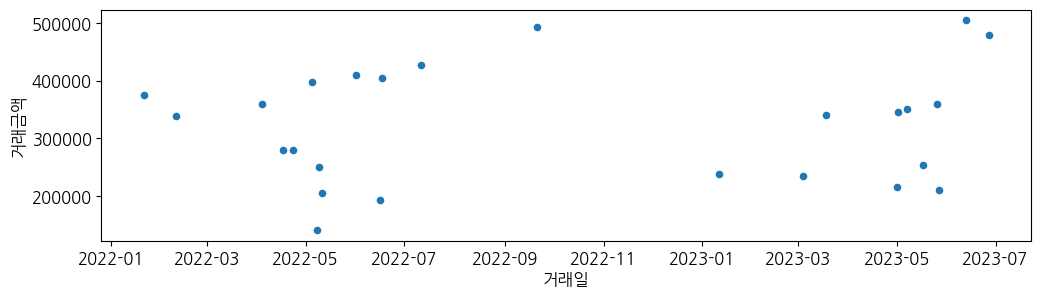

In [39]:
x_30_firstpark.plot('거래일','거래금액', kind='scatter')

In [40]:
df['년'] = df['거래일'].dt.year 
df['월'] = df['거래일'].dt.month 

In [42]:
df.groupby(['년', '월'], as_index=True).mean(['거래금액'])

건축년도          층        전용면적          일           거래금액  \
년    월                                                                  
2022 1   2006.636364  11.218182   77.432229  14.490909  211592.000000   
     2    1998.97561  10.658537   91.389073  15.707317  202046.341463   
     3   2009.903704   9.140741   67.492699  20.496296  158982.962963   
     4   2002.546763   9.589928   96.979639  14.467626  248525.899281   
     5       2002.52      10.43   99.625538      15.67  246674.500000   
     6   2000.981818   9.345455   97.576036       13.4  263108.727273   
     7   2006.973684   9.578947   92.489374  13.973684  205950.000000   
     8       2000.08       8.68   79.575280      16.36  159540.960000   
     9   2000.619048   9.095238   79.106848  11.761905  200226.666667   
     10  2000.529412   8.882353  102.572588  14.647059  177267.058824   
     11  2006.419355  11.387097   82.018110  14.677419  193015.806452   
     12    2001.3125   10.40625  106.437500   16.65625  231171.250000   
2023 1   1998.176471   9.607843   93.747202  17.941176  213727.450980   
     2   1999.409091  11.420455   90.367366  16.352273  217446.590909   
     3   2001.773438   9.773438   87.326501  15.820312  210161.273438   
     4   2001.329114   10.21519   93.977589   15.64557  213331.645570   
     5   2002.503226   11.23871   87.987014  16.232258  215515.167742   
     6    2002.05914  10.564516   87.295000   14.33871  216568.817204   

               평형대  
년    월              
2022 1   20.363636  
     2   23.170732  
     3   18.370370  
     4   24.244604  
     5   25.300000  
     6   25.454545  
     7   23.157895  
     8   20.400000  
     9   19.523810  
     10  27.647059  
     11  20.967742  
     12  26.875000  
2023 1   22.941176  
     2   21.704545  
     3   21.562500  
     4   23.037975  
     5   20.709677  
     6   20.913978

# 여러개의 함수를 적용하여 GroupBy 집계
 - grouped.agg()

https://rfriend.tistory.com/392

# 연습문제(Exercise) 2 - Just Do It Now !

In [43]:
# 법정동, 년, 월 3개 값을 기준으로 groupby 하고, [거래량, 평균, 최고가, 최저가]를 뽑아보세요
# 1. df.groupby()
grouped = df.groupby(['법정동', '년', '월'])

# 2. 원하는 통계뽑기  HINT :  ['size' : 거래량, 'mean' : 평균, 'max' : 최대값, 'min' : 최소값]
function_list = ['size', 'mean', 'max', 'min']

# groupby_result.apply(pd.to_numeric)
# 3  grouped object.agg(function list)
groupby_result = grouped['거래금액'].agg(function_list)

# 4. 필요groupby_result시 데이터 타입으로 변경
groupby_result['mean'] = groupby_result['mean'].astype(int)

# 5. loc를 이용해서 특정동만 인덱싱하여 출력
groupby_result.loc['반포동']

size    mean     max     min
년    월                               
2022 1     13  461923  745000  272000
     2      7  400785  660000  261000
     3     25  416620  800000  170000
     4     45  358366  715000   91000
     5     25  408300  710000  182500
     6     14  428642  720000   90000
     7      4  503000  840000  295000
     8      3  298374  378000  255000
     9      4  546300  730000  247200
     10     2  376500  523000  230000
     11     7  436285  840000  269000
     12     7  384500  660000  263500
2023 1     21  271547  545000   90000
     2     28  295610  530000  130000
     3     32  338546  680000  130000
     4     43  278495  810000   79000
     5     33  290166  725000  150000
     6     48  312875  640000   84000

In [44]:
# 20 평대 거래건수만 필터링 합니다.

In [45]:
x_20 = df.loc[df['평형대']==20]
x_20

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,등기일자,거래일,평형대
7,11650,강남대로16길,양재동,322,서초,2001,3,83.52,2022,1,...,10200,1,11650-672,중개거래,서울 서초구,None,None,None,2022-01-07,20.0
8,11650,강남대로2길,양재동,362-6,동원그린,2002,1,78.34,2022,1,...,10200,1,11650-467,중개거래,서울 서초구,None,None,None,2022-01-16,20.0
9,11650,강남대로12길,양재동,317-4,경희궁,2001,3,81.75,2022,1,...,10200,1,11650-671,중개거래,서울 서초구,None,None,None,2022-01-24,20.0
10,11650,바우뫼로,양재동,160-2,우성KBS(113동),1996,10,84.69,2022,1,...,10200,1,11650-488,중개거래,서울 서초구,None,None,None,2022-01-25,20.0
11,11650,양재대로2길,우면동,773,서초힐스,2012,16,84.95,2022,1,...,10300,1,11650-3821,중개거래,"서울 강남구, 서울 서초구",None,None,None,2022-01-15,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,11650,사임당로,서초동,1333,신동아아파트(1차),1978,9,75.86,2023,6,...,10800,1,11650-53,중개거래,서울 서초구,None,None,None,2023-06-28,20.0
1450,11650,사임당로,서초동,1333,신동아아파트(1차),1978,10,86.61,2023,6,...,10800,1,11650-53,중개거래,서울 서초구,None,None,None,2023-06-30,20.0
1451,11650,헌릉로8길,내곡동,411,서초더샵포레,2014,12,84.41,2023,6,...,10900,1,11650-4063,중개거래,서울 서초구,None,None,23.08.30,2023-06-10,20.0
1452,11650,헌릉로8길,내곡동,NaN,서초포레스타2단지,2015,15,84.41,2023,6,...,10900,1,11650-4156,중개거래,서울 서초구,None,None,23.09.05,2023-06-10,20.0


In [46]:
x_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 7 to 1453
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지역코드        553 non-null    object        
 1   도로명         552 non-null    object        
 2   법정동         553 non-null    object        
 3   지번          546 non-null    object        
 4   아파트         553 non-null    object        
 5   건축년도        553 non-null    Int64         
 6   층           553 non-null    Int64         
 7   전용면적        553 non-null    float64       
 8   년           553 non-null    int32         
 9   월           553 non-null    int32         
 10  일           553 non-null    Int64         
 11  거래금액        553 non-null    int64         
 12  도로명건물본번호코드  552 non-null    object        
 13  도로명건물부번호코드  552 non-null    object        
 14  도로명시군구코드    552 non-null    object        
 15  도로명일련번호코드   553 non-null    object        
 16  도로명지상지하코드   506 non-null    ob

In [47]:
grouped = x_20.groupby(['법정동', '년', '월'])
function_list = ['size', 'mean', 'max', 'min']
groupby_result = grouped['거래금액'].agg(function_list) 

In [48]:
groupby_result

size           mean     max     min
법정동 년    월                                     
내곡동 2022 2     1  175000.000000  175000  175000
    2023 1     1  125000.000000  125000  125000
         3     3  130333.333333  133000  125000
         4     2  124000.000000  128000  120000
         5     1  138000.000000  138000  138000
...          ...            ...     ...     ...
잠원동 2023 2    13  218076.923077  297000  169000
         3    18  227000.000000  336000  150000
         4    15  238533.333333  337000  165000
         5    11  239527.272727  300000  199800
         6    18  223222.222222  370000  155000

[92 rows x 4 columns]

In [49]:
# groupby_result.apply(pd.to_numeric)
groupby_result['mean'] = groupby_result['mean'].astype(int)
groupby_result.loc['반포동']

size    mean     max     min
년    월                               
2022 1      4  373250  466000  272000
     2      4  288875  350000  261000
     3     14  335750  380000  218000
     4     21  318047  440000   91000
     5     13  325038  410000  182500
     6      3  316000  340000  284000
     7      1  295000  295000  295000
     8      2  320062  378000  262124
     9      1  247200  247200  247200
     11     3  328333  365000  290000
     12     5  304300  348000  263500
2023 1     11  256409  329000  127500
     2     14  263392  340000  130000
     3     13  250269  340000  130000
     4     21  227785  350000   79000
     5     14  296285  398000  184000
     6     24  288312  368000  155000

In [50]:
grouped_1 = x_20.groupby(['법정동', '거래일'])
function_list = ['size', 'mean', 'max', 'min']
groupby_result_1 = grouped_1['거래금액'].agg(function_list)

groupby_result_1['mean'] = groupby_result_1['mean'].astype(int)
dong = groupby_result_1.loc['반포동']
dong

,size,mean,max,min
거래일,,,,
2022-01-06,1,272000,272000,272000
2022-01-11,1,375000,375000,375000
2022-01-15,1,380000,380000,380000
2022-01-21,1,466000,466000,466000
2022-02-08,1,267500,267500,267500
...,...,...,...,...
2023-06-19,1,360000,360000,360000
2023-06-23,1,354500,354500,354500
2023-06-24,3,301000,315000,273000


In [51]:
year_summary = df.groupby(['년'])['거래금액'].agg(['sum','mean', 'count'])
year_summary

,sum,mean,count
년,,,
2022,147481584,214051.645864,689
2023,164329094,214528.843342,766


<AxesSubplot:xlabel='법정동'>

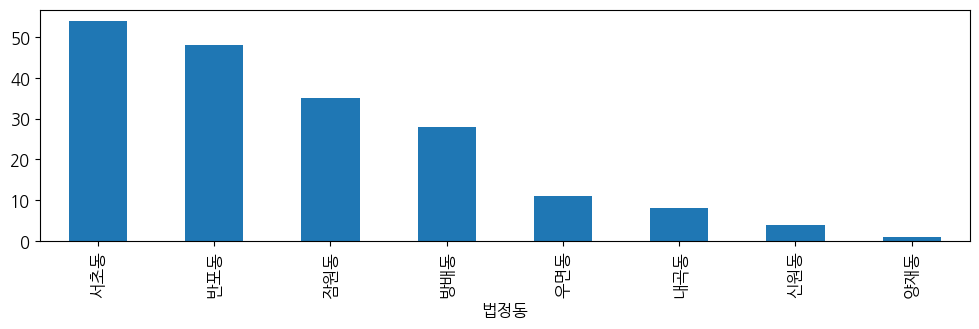

In [52]:
x_30.value_counts('법정동').plot(kind='bar')

<AxesSubplot:xlabel='평형대'>

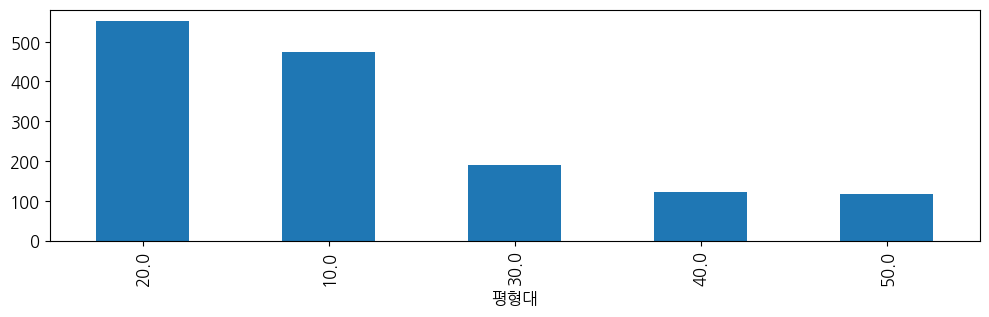

In [53]:
df.value_counts('평형대').plot(kind='bar')

# 5일, 10일, 30일 이동평균선 구하기

In [54]:
import warnings
warnings.filterwarnings("ignore")

# dong['MA3'] = dong['mean'].rolling(3).mean()
dong['MA5'] = dong['mean'].rolling(5).mean()
dong['MA10'] = dong['mean'].rolling(10).mean()
dong['MA30'] = dong['mean'].rolling(30).mean()
dong

,size,mean,max,min,MA5,MA10,MA30
거래일,,,,,,,
2022-01-06,1,272000,272000,272000,NaN,NaN,NaN
2022-01-11,1,375000,375000,375000,NaN,NaN,NaN
2022-01-15,1,380000,380000,380000,NaN,NaN,NaN
2022-01-21,1,466000,466000,466000,NaN,NaN,NaN
2022-02-08,1,267500,267500,267500,352100.0,NaN,NaN
...,...,...,...,...,...,...,...
2023-06-19,1,360000,360000,360000,290850.0,268300.0,281400.000000
2023-06-23,1,354500,354500,354500,303600.0,284225.0,285133.333333
2023-06-24,3,301000,315000,273000,298300.0,285525.0,285433.333333


# 본인이 살고있는 지역구, 해당동 거래금액 및 거래량 그래프 시각화

In [55]:
# !pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [56]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# !pip install --upgrade mplfinance

In [57]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

[그래프 구역 나누기 참고 블로그](https://yeko90.tistory.com/entry/matplotlib-%EA%B8%B0%EC%B4%88-subplot2grid%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EC%BB%A4%EC%8A%A4%ED%84%B0%EB%A7%88%EC%9D%B4%EC%A7%95)

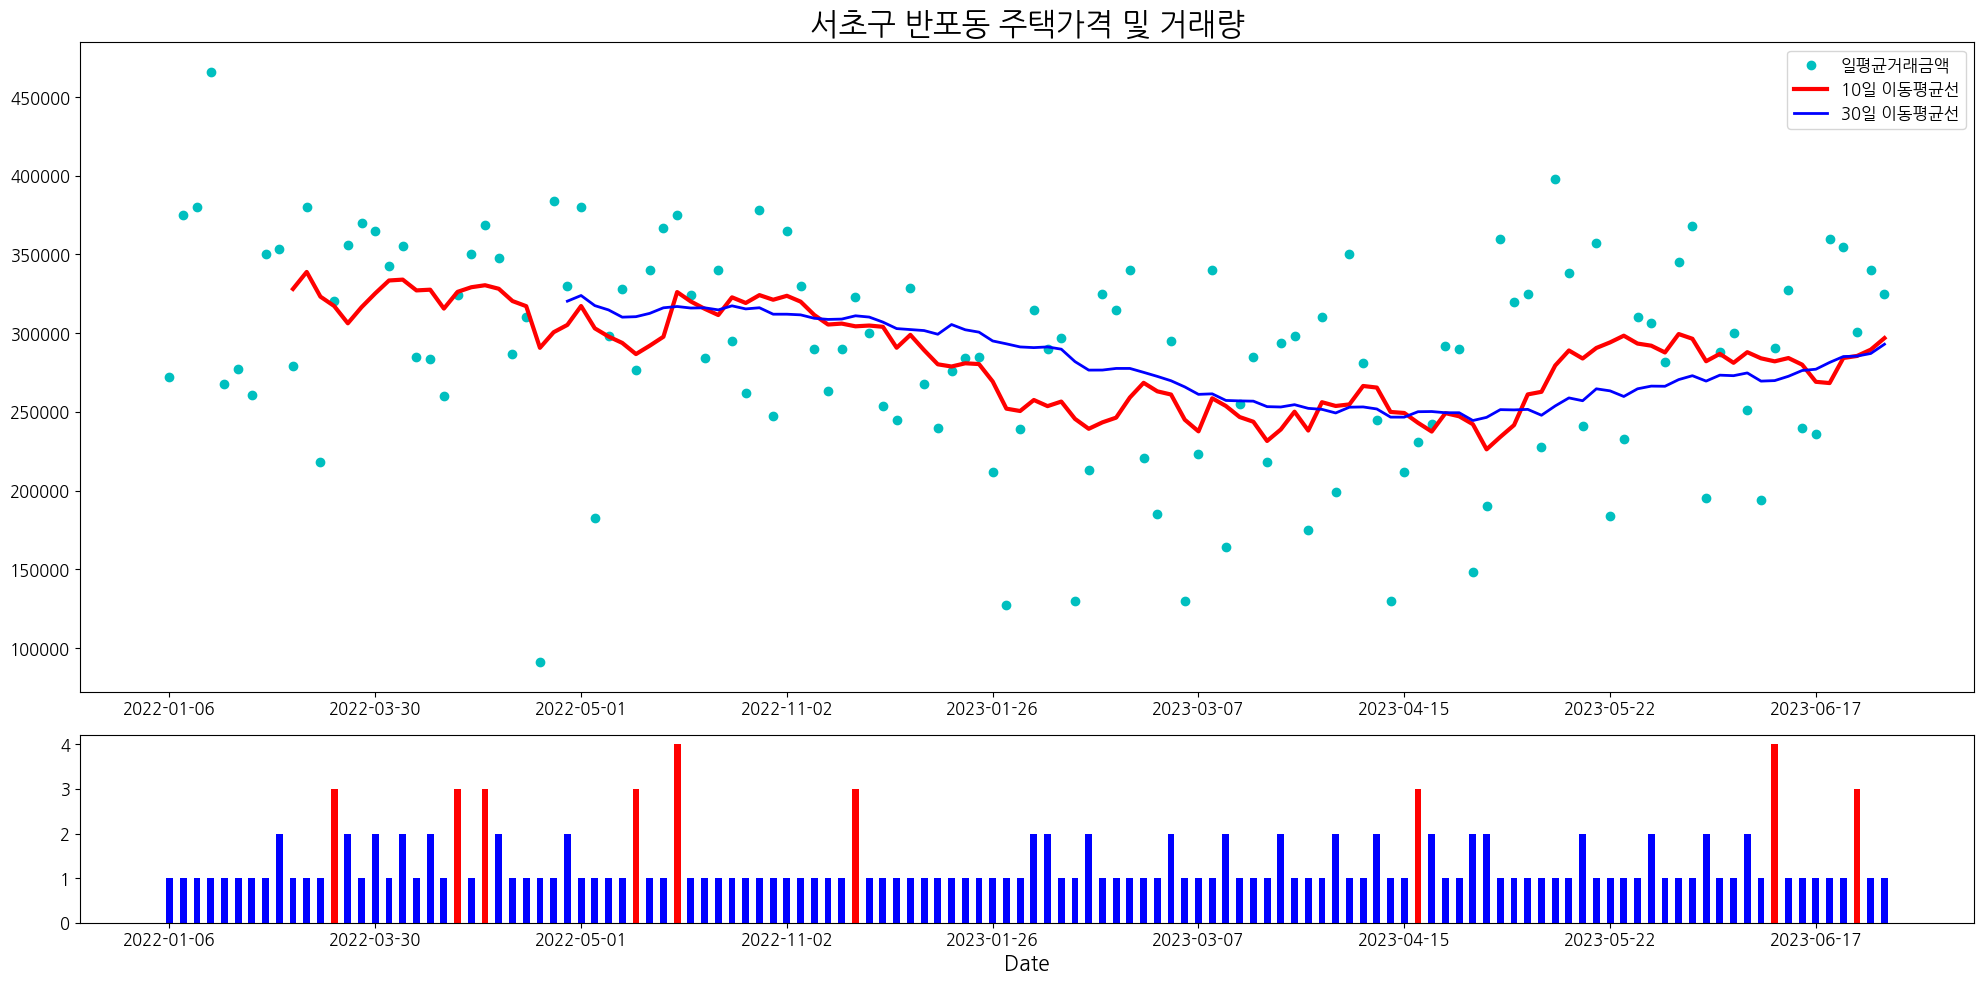

In [61]:
#----------------------------------------------------------------------------------#
# 그래프 구역 나누기 #참고 블로그 공부하시면 좋아요
fig = plt.figure(figsize=(20,10))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4) # 첫번째 인자값 (4,4)는 전체 shape, 두번째 인자값은 top axes의 위치 첫행(0), 첫열(0), 사이즈는 세로3x4가로
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4, sharex=top_axes) #두번째 인자값 3,0 에서 3은 네번째 행, 0은 첫번째열, 세로 1 x 가로 4
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)
#----------------------------------------------------------------------------------#

# 인덱스 설정
idx = dong.index.astype('str')

# 일 평균 거래금액
top_axes.plot(idx.to_numpy(), dong['mean'].to_numpy(), 'co', label='일평균거래금액', linewidth=0.7)

# 거래금액 이동평균선 그리기
top_axes.plot(idx.to_numpy(), dong['MA10'].to_numpy(),'r-', label='10일 이동평균선', linewidth=3.0)
top_axes.plot(idx.to_numpy(), dong['MA30'].to_numpy(),'b-', label='30일 이동평균선', linewidth=2.0)

# 캔들차트 그리기

#----------------------------------------------------------------------------------#

# 거래량 날짜 지정. 평균 거래량(건수) 보다 큰 날은 빨강, 작은 날은 파랑
color_fuc = lambda x : 'r' if x >dong['size'].mean() else 'b'
# color_fuc = lambda x : 'r' if x >= 0 else 'b'
color_list = list(dong['size'].diff().fillna(0).apply(color_fuc))

bottom_axes.bar(idx, dong['size'], width=0.5, 
                align='center',
                color=color_list)
#----------------------------------------------------------------------------------#

# 그래프 title 지정
top_axes.set_title('서초구 반포동 주택가격 및 거래량', fontsize=22)

# X축 티커 숫자 10개로 제한 (22개월->22개)
top_axes.xaxis.set_major_locator(ticker.MaxNLocator(10))

# X축 라벨 지정
bottom_axes.set_xlabel('Date', fontsize=15)

top_axes.legend()
plt.tight_layout()
plt.show()

### 정리 잘 되어있는 블로그, 깃허브 추천
 - [실거래가 데이터 핸들링 기초](https://baem1n.dev/2021/01/31/DATA-APT-05/#%EA%B5%AC%EB%B3%84-%ED%95%A9%EA%B3%84-%EA%B1%B0%EB%9E%98-%EA%B8%88%EC%95%A1-%EA%B3%84%EC%82%B0)
 - [파이썬으로 배우는 알고리즘 트레이딩](https://wikidocs.net/4765)
 - [청년 데이터 프로젝트](https://github.com/ek-koh/zipdoc_project/blob/master/pre_processing/%EC%9D%B8%EA%B5%AC%EC%A3%BC%ED%83%9D%EC%B4%9D%EC%A1%B0%EC%82%AC_%EA%B0%80%EA%B5%AC%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb)
 - [플롯 틱수 설정방법](https://www.delftstack.com/ko/howto/matplotlib/set-number-of-plot-ticks/)

In [ ]:
# ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead
# 위 에러 발생시 넘파이 형태로 변환.to_numpy()